<a href="https://colab.research.google.com/github/chandra-sekar-1983/eda/blob/master/EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### import libaries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [0]:
#### specifiying path of data - modify the file path
filepath="/content/train.csv"

In [0]:
### reading the file
df = pd.read_csv(filepath)

In [0]:
### exploring size of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#### info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
### different columns 
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
### modify the column names here
output_col="SalePrice"
input_col=[col for col in df.columns if col not in output_col]

In [0]:
### printing output and input columns
print(f" Output column is {output_col}") 
print(f"Number of input featueas are {len(input_col)} Input column is {input_col}")

 Output column is SalePrice
Number of input featueas are 80 Input column is ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'Ope

In [0]:
### Finding if the data set contains missing elements are not.True indicates presence of missing elements

df.isnull().values.any()

True

In [0]:
### Finding total number of rows that contains missing elements
print("Number of rows that contain missing element ",df.isnull().sum().sum())
print(f"Percentage of Dataset that contains missing element is {round(df.isnull().sum().sum()/len(df),2)} %")

Number of rows that contain missing element  6965
Percentage of Dataset that contains missing element is 4.77 %


In [0]:
## Any specific columns has missing values
missing_val_columns=[(col,df[col].isnull().sum()) for col in df.columns if df[col].isnull().sum()>0]
print("The missing value columns are ")
print(missing_val_columns)


The missing value columns are 
[('LotFrontage', 259), ('Alley', 1369), ('MasVnrType', 8), ('MasVnrArea', 8), ('BsmtQual', 37), ('BsmtCond', 37), ('BsmtExposure', 38), ('BsmtFinType1', 37), ('BsmtFinType2', 38), ('Electrical', 1), ('FireplaceQu', 690), ('GarageType', 81), ('GarageYrBlt', 81), ('GarageFinish', 81), ('GarageQual', 81), ('GarageCond', 81), ('PoolQC', 1453), ('Fence', 1179), ('MiscFeature', 1406)]


In [0]:
### Calculating Percentage of missing observation with respect to full dataset

missing_val_columns=pd.DataFrame(missing_val_columns)
missing_val_columns[1]=round(missing_val_columns[1]/len(df),2)

missing_val_columns=missing_val_columns.rename(columns={0:"Feature",1:"% of missing observations"})
missing_val_columns=missing_val_columns.sort_values(by='% of missing observations', ascending=False)
missing_val_columns

,Feature,% of missing observations
16,PoolQC,1.00
18,MiscFeature,0.96
1,Alley,0.94
17,Fence,0.81
10,FireplaceQu,0.47
0,LotFrontage,0.18
11,GarageType,0.06
12,GarageYrBlt,0.06
13,GarageFinish,0.06
14,GarageQual,0.06


PoolQC feature has highest number of missing values, 1.0 %


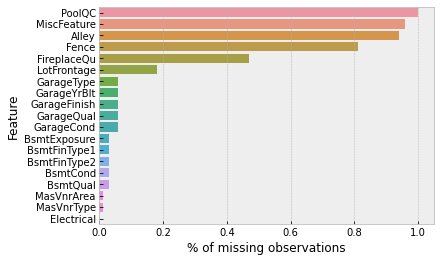

In [0]:
### Visualizing the distribution of missing features

print(f"{missing_val_columns.max()[0]} feature has highest number of missing values, {missing_val_columns.max()[1] } %")
ax = sns.barplot(x="% of missing observations",y="Feature", data=missing_val_columns,orient = 'h')



Approach :
1.Drop observations for rows which has less than 0.3% of missing values.
2.Drop columns which has more than 50% missing values
3.Impute missing values.

Approach 1.Drop observations for rows which has less than 0.3% of missing values.



In [0]:
## set missing value threshold for removing observations
miss_val_obser_threshold=0.3
missing_value_below_threshold=missing_val_columns[missing_val_columns["% of missing observations"]<miss_val_obser_threshold]
to_remove_obser=[col for col in missing_value_below_threshold["Feature"]]
print(f"Features which has {miss_val_threshold} of missing values are {to_remove_obser}")

Features which has 0.3 of missing values are ['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical']


In [0]:
print("The dimension of the dataset before removing observation is ",df.shape)

df2=df.dropna(axis=0, how='any', thresh=None, subset=to_remove_obser,inplace=False)

print("The dimension of the dataset after removing missing observation is ",df2.shape)

The dimension of the dataset before removing observation is  (1460, 81)
The dimension of the dataset after removing missing observation is  (1094, 81)


Approach 2.Drop Features which has more than 20% of missing values.

In [0]:
### modify the value here - setting missing value threshold in columns
miss_val_feature_threshold=0.3
missing_value_above_threshold=missing_val_columns[missing_val_columns["% of missing observations"]>miss_val_feature_threshold]
to_remove_feature=[col for col in missing_value_above_threshold["Feature"]]
print(f"Features which has more than {miss_val_feature_threshold} % of missing values are {to_remove_feature}")


Features which has more than 0.3 % of missing values are ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


In [0]:
print("The dimension of the dataset before removing Features is ",df.shape)

df2=df2.drop(columns=to_remove_feature)

print("The dimension of the dataset after removing missing Features is ",df2.shape)

The dimension of the dataset before removing Features is  (1460, 76)
The dimension of the dataset after removing missing Features is  (1094, 76)


Approach 3.Impute missing values - Numeric columns mean imputation and Categorical columns mode impuation

In [0]:
## finding cardinality of  feature and selecting categorical features
cols =df2.columns
for col in cols :
  print((col,df2[col].nunique()),df2[col].unique())

('Id', 1094) [   1    2    3 ... 1458 1459 1460]
('MSSubClass', 15) [ 60  20  70  50 190  45 120  30  90  80 160  75 180  40  85]
('MSZoning', 5) ['RL' 'RM' 'C (all)' 'FV' 'RH']
('LotFrontage', 107) [ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  66. 101.  57.
  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  52. 100.  24.  89.
  63.  76.  72.  81.  95.  69.  21.  32.  78. 121. 122.  40.  73.  77.
  94. 105.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.  86.  62.
 141.  97.  54.  64.  41.  79. 174.  99.  83.  43. 103.  93.  30. 129.
 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.  56. 102.
  38. 109. 130.  67.  53. 137.  58. 106. 104.  42.  39. 144.  45. 114.
 128. 149. 313. 168. 182. 160. 152. 124.  46.]
('LotArea', 806) [  8450   9600  11250   9550  14260  14115  10084   6120   7420  11200
  11924  10652  13695   7560  14215   7449   9742   4224  14230   7200
  11478  16321   6324   8500  11049  10552   7313  13418  10859   8532
   7922   8658  16905   794

In [0]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [0]:
## write code for selecting categorical and numeric as below code does not infer data types correctly - modify the code
numeric_col=["Id","Id"]
categorical_col=["MSZoning","MSZoning"]
date_time_col=''

In [0]:
### modify this code based on above code
import numpy as np
### splitting categorical, continuous and datetime features

print(f"Number of numeric columns are {len(numeric_col)},{(numeric_col)}")
print(f"Number of categorical columns are {len(categorical_col)},{categorical_col}")
print(f"Number of numeric columns are {len(date_time_col)},{date_time_col}")

Number of numeric columns are 2,['Id', 'Id']
Number of categorical columns are 2,['PoolQC', 'PoolQC']
Number of numeric columns are 0,


In [0]:
### checking are there any other variables with different data types
missed_out_features=df2.shape[1]-len(numeric_col)-len(categorical_col)-len(date_time_col)
print(f"The missed out features are ",missed_out_features)

The missed out features are  72


In [0]:
df2.sum()

Id                                                          795748
MSSubClass                                                   61405
MSZoning         RLRLRLRLRLRLRLRMRLRLRLRLRMRLRLRLRMRLRMRLRLRLRL...
LotFrontage                                                  77411
LotArea                                                   11084787
                                       ...                        
MoSold                                                        6931
YrSold                                                     2196518
SaleType         WDWDWDWDWDWDWDWDWDWDNewNewWDWDCODNewWDWDWDWDWD...
SaleCondition    NormalNormalNormalAbnormlNormalNormalNormalAbn...
SalePrice                                                204614390
Length: 76, dtype: object

In [0]:
### Missing value imputation for continuous variable based on Mean
for col in numeric_col:
  
  print('The column name is ',col)
  print(f"Mean values before imputation is {df2[col].mean()}")
  df2[col]=df2[col].fillna(df2[col].mean())
  print(f"Mean values after imputation is {df2[col].mean()}")

  print("_______________________________________________________")




The column name is  Id
Mean values before imputation is 728.0402561756633
Mean values after imputation is 728.0402561756633
_______________________________________________________
The column name is  Id
Mean values before imputation is 728.0402561756633
Mean values after imputation is 728.0402561756633
_______________________________________________________


In [0]:
### Missing value imputation for categorical variable based on Mode

In [0]:
for col in categorical_col:
  print('The column name is ',col)
  print()
  print(f"Unique values before imputation is {df2[col].unique()}")
  print(f"Value before imputation is {df2[col].value_counts()}")
  df2[col]=df2[col].fillna(df2[col].mode())
  print()
  print(f"Unique Value after imputation is {df2[col].unique()}")
  print(f"Value after imputation is  - {df2[col].value_counts()}")
  print("_______________________________________________________")
  print()
  

The column name is  MSZoning

Unique values before imputation is ['RL' 'RM' 'C (all)' 'FV' 'RH']
Value before imputation is RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64

Unique Value after imputation is ['RL' 'RM' 'C (all)' 'FV' 'RH']
Value after imputation is  - RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64
_______________________________________________________

The column name is  MSZoning

Unique values before imputation is ['RL' 'RM' 'C (all)' 'FV' 'RH']
Value before imputation is RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64

Unique Value after imputation is ['RL' 'RM' 'C (all)' 'FV' 'RH']
Value after imputation is  - RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64
_______________________________________________________



***Finding the distribution of Features***

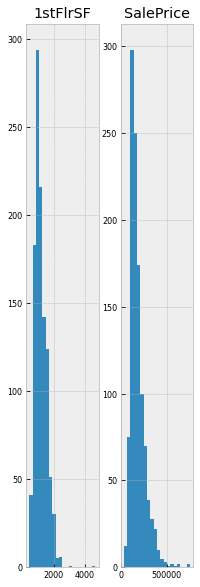

In [0]:
### Plotting distribution of numerical variables
#numeric_col=["SalePrice","1stFlrSF"]
df2[numeric_col].hist(figsize=(3, 10), bins=20, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


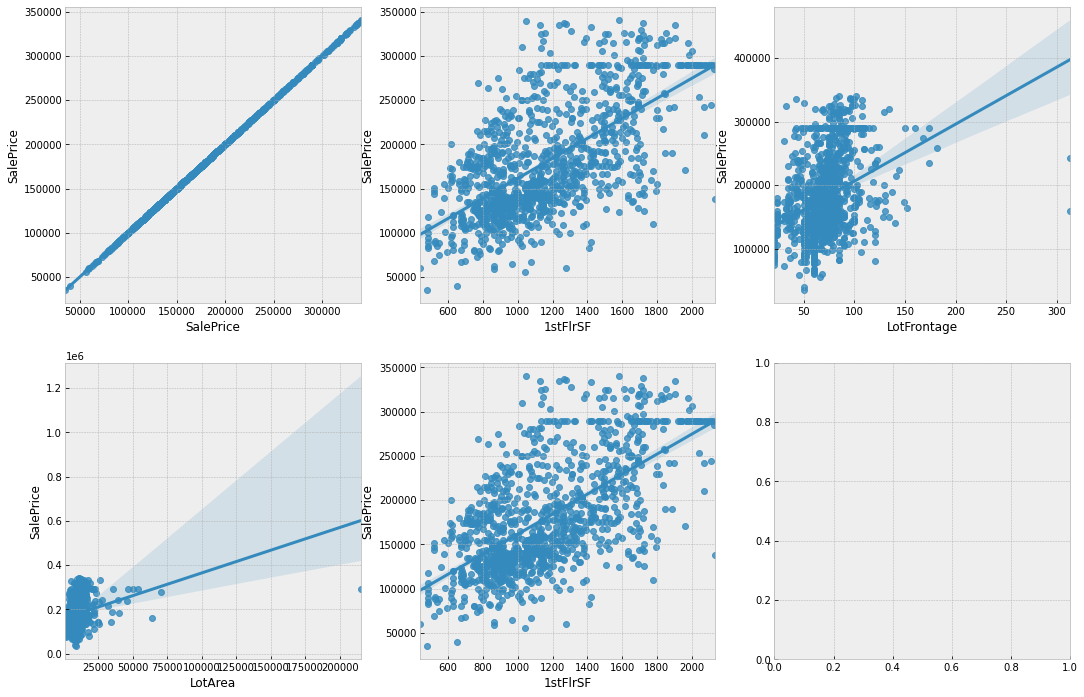

In [561]:
### Plotting distribution of numerical variables
fig, ax = plt.subplots(round(len(numeric_col) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(numeric_col):
    #for i in numeric_col:
        sns.regplot(x=numeric_col[i],y='SalePrice', data=df2, ax=ax)



We can see that features such as TotalBsmtSF, 1stFlrSF, GrLivArea have a big spread but I cannot tell what insights this information gives us

Distribution of categorical variables




Analyzing relationship between categorical and sales 

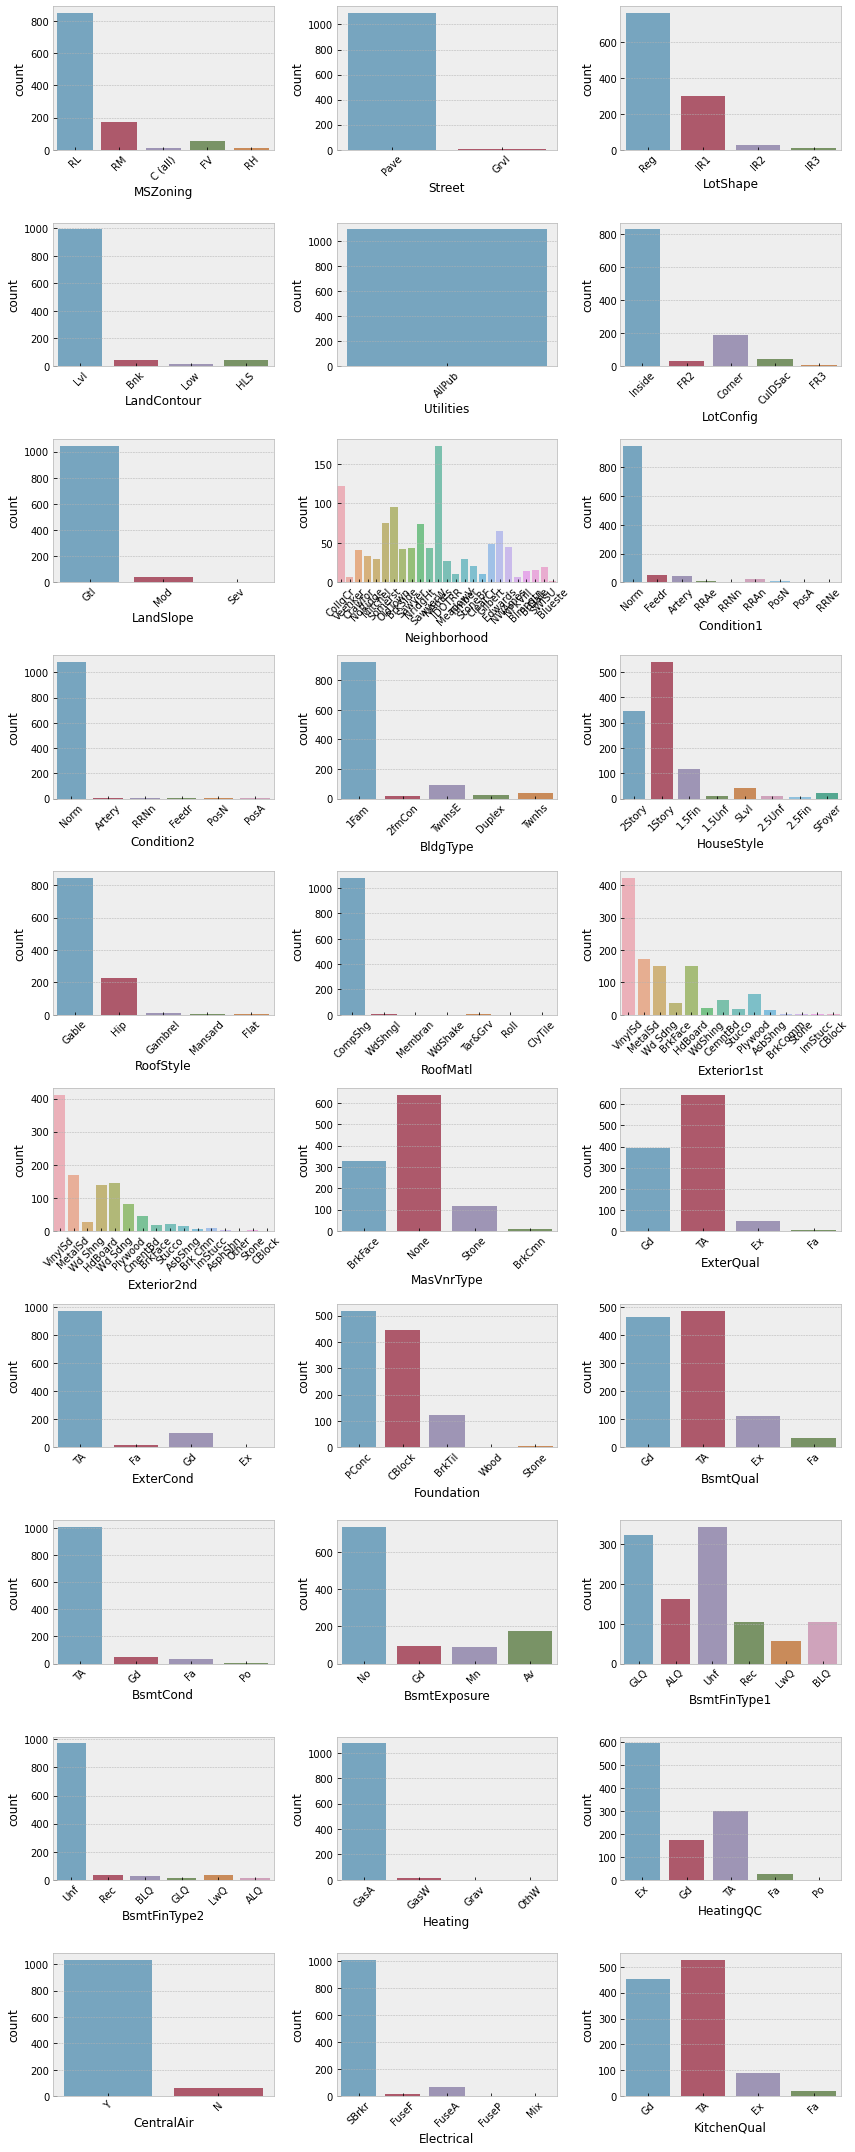

In [568]:
categorical_col=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional']

fig, axes = plt.subplots(round(len(categorical_col) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_col):
    #for col in categorical_col:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical_col[i], alpha=0.7, data=df2, ax=ax)

fig.tight_layout()

**Insights : Many features contains rare labels **

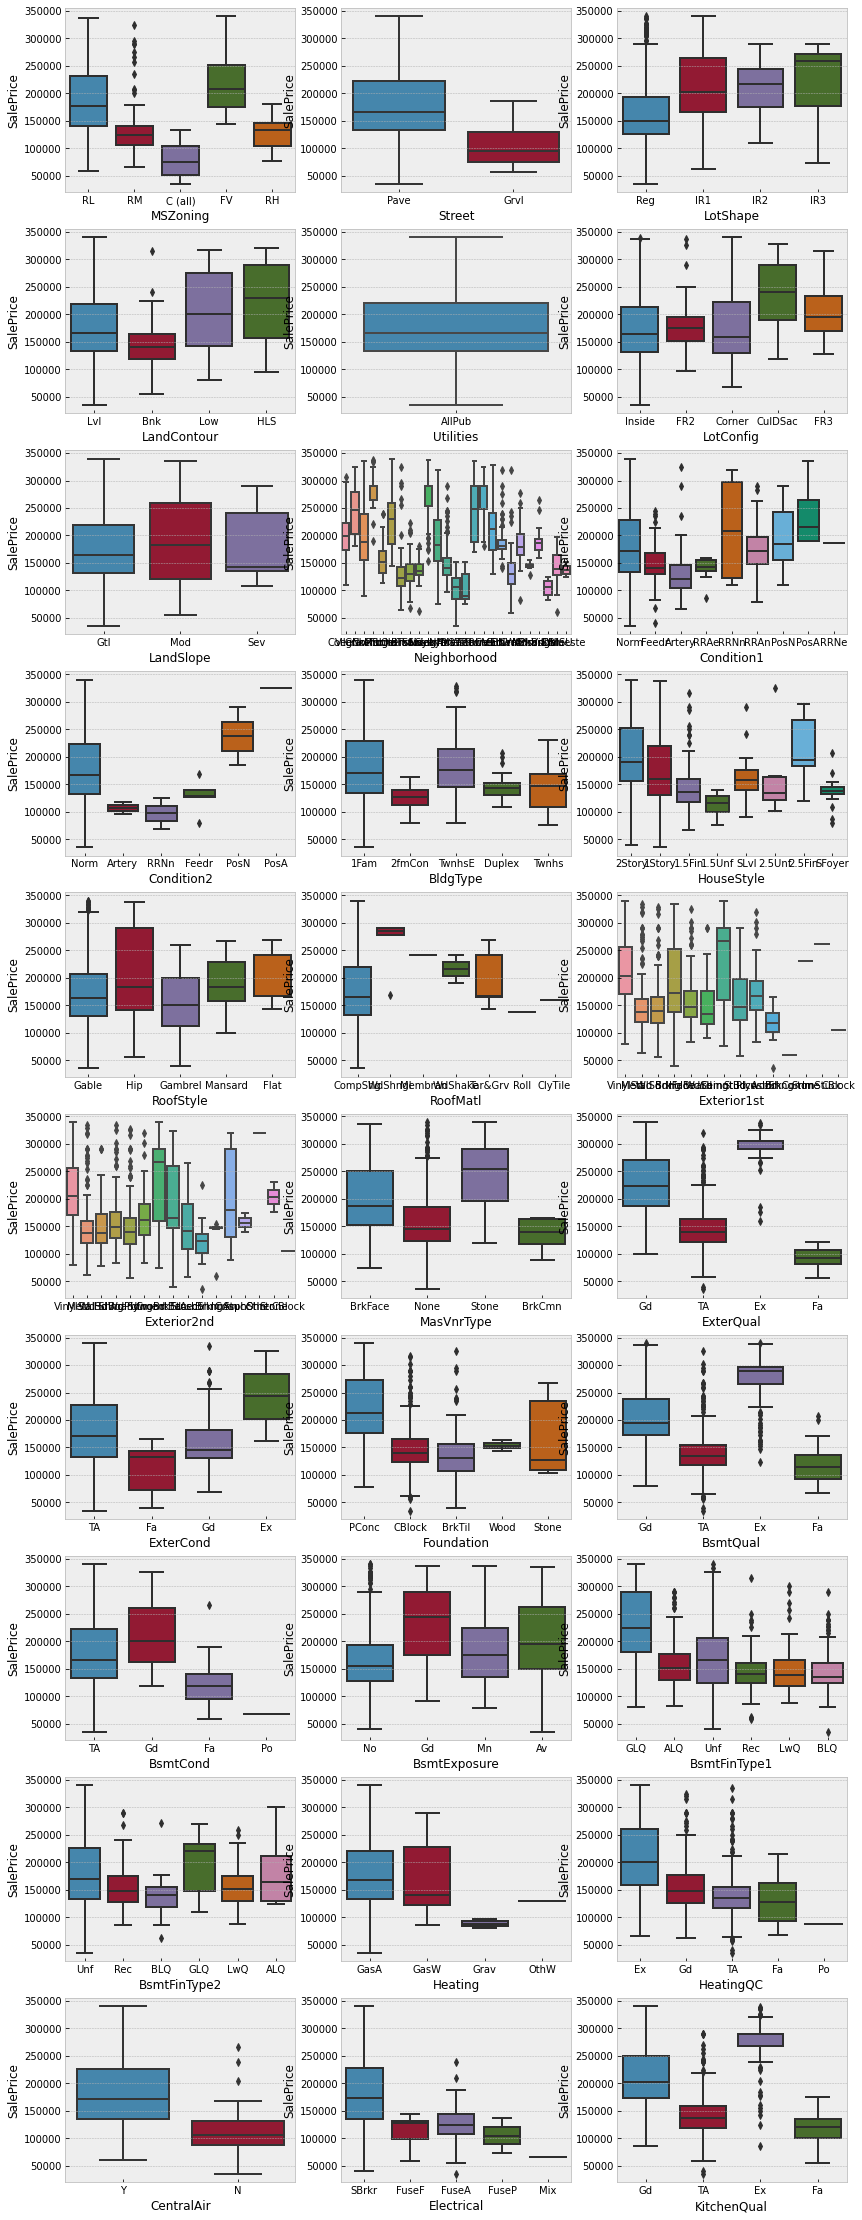

In [565]:
### Plotting distribution of numerical variables
fig, ax = plt.subplots(round(len(categorical_col) / 3), 3, figsize = (14, 40))

for i, ax in enumerate(fig.axes):
  
    if i < len(categorical_col) :
        sns.boxplot(x=categorical_col[i],y='SalePrice', data=df2, ax=ax)

Insight : Mean variance is noticeable in every **category** **bold text**
Less Variance categories can be removed


In [0]:
## remove the correalted variables to avoid multicollinearity issue

Outlier Treatment - Trimming and Ceiling

Visualizing the Outliers using scatterplot before outlier treatment

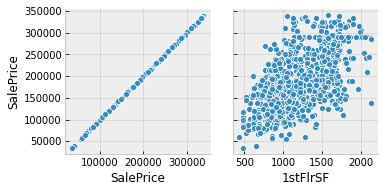

In [496]:
for i in range(0, len(df2[numeric_col].columns), 5):
    
    sns.pairplot(data=df2[numeric_col],
                x_vars=df2[numeric_col].columns[i:i+5],
                y_vars=[output_col])

In [507]:
## Printing skewness before outliear treament
print("Skewness before outlier treatment for feature")
for col in numeric_col:
  print(f" {col} - {df2[col].skew()}")

Skewness before outlier treatment for feature
 SalePrice - 2.0617572039619
 1stFlrSF - 33.06885925175999


In [0]:

## function to treat outliers:
def outlier_treatment(numeric_col):
  for col in numeric_col:

     sorted(df2[col])
     Q1,Q3 = np.percentile(df[col] , [25,75])
     IQR = Q3 - Q1
     lower_range = Q1 - (1.5 * IQR)
     upper_range = Q3 + (1.5 * IQR)
     quantile_10_value=df2[col].quantile(0.10)
     quantile_90_value=df2[col].quantile(0.90)
     df2[col] = np.where(df2[col] < lower_range, quantile_10_value,df2[col])
     df2[col] = np.where(df2[col] >upper_range,quantile_90_value,df2[col])
   

In [0]:
outlier_treatment(numeric_col)

In [510]:
## Printing skewness after outliear treament
print("Skewness before outlier treatment for feature")
for col in numeric_col:
  print(f" {col} - {df2[col].skew()}")

Skewness before outlier treatment for feature
 SalePrice - 0.6097176960002989
 1stFlrSF - 0.5119821300255819


Visualizing after fixing outliers

0.6097176960002989


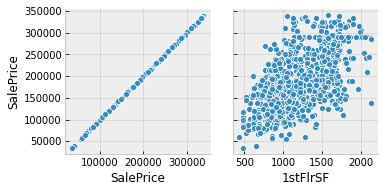

In [495]:
for i in range(0, len(df2[numeric_col].columns), 5):
    print(df2["SalePrice"].skew())
    sns.pairplot(data=df2[numeric_col],
                x_vars=df2[numeric_col].columns[i:i+5],
                y_vars=[output_col])

In [506]:
##df2["SalePrice"][0]=1000000
##df2["1stFlrSF"][0]=1000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [584]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df2["SalePrice"]))
print(z)
outlier=df2.SalePrice[(z<3).all(axis=1)]
outlier

[1.73165909 0.02268783 0.68422509 ... 1.36151324 0.59750335 0.51284234]


AxisError: ignored

Visualizing Multicollinearity using Heatmap

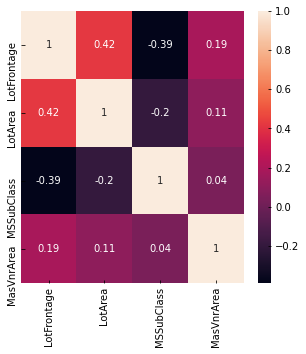

In [529]:
numeric_col=["LotFrontage","LotArea","MSSubClass","MasVnrArea"]
corr= df2[numeric_col].corr() # We already examined SalePrice correlations
plt.figure(figsize=(5, 5))

sns.heatmap(corr, annot = True)


In [526]:
corr

,LotFrontage,LotArea,MSSubClass,MasVnrArea
LotFrontage,1.000000,0.419714,-0.389466,0.189769
LotArea,0.419714,1.000000,-0.197903,0.106600
MSSubClass,-0.389466,-0.197903,1.000000,0.040009
MasVnrArea,0.189769,0.106600,0.040009,1.000000
